 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [60]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['all', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## choose which distributions to use 

In [61]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

## and which mean to give it

In [62]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [63]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


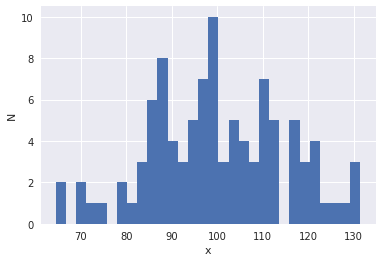

In [64]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md= {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now1 is a dictionary with one object: an array by the key 'chisq'
pl.hist(md1['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [65]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.86, standard deviation: 13.77


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [66]:
mysize = (2000 / (np.array(range(1, 200)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20   19   19   19   19   19
   18   18   18   18   18   18   17   17   17   17   17   17   16   16   16
   16   16   16   16   16   15   15   15   15   15   15   15   15   14   14
   14   14   14   14   14   14   14   13   13   13   13   13   13   13   13
   13   13   13   12   12   12   12   12   12   12   12   12   12   12   12
   12   11   11   11   11   11   11   11   11   11   11   11   11   11   11
   11   10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10  

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


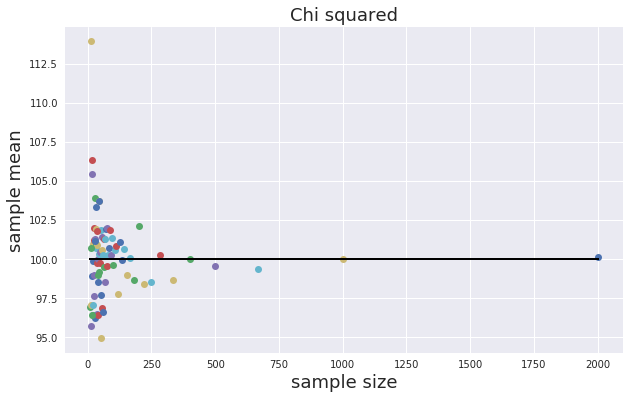

In [67]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of different sizes)
import numpy as np
md = {}
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2:  The average of the results obtained from 100 trials is tend to close to population mean, 100, in this case. This result fits the law of large number.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since I put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


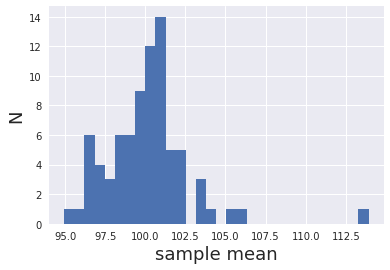

In [68]:
allmeans = list(md['chisq']['means'].values())
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: histogram for Chi-sqaured distribution sample means

# Do it for the Normal distribution


Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


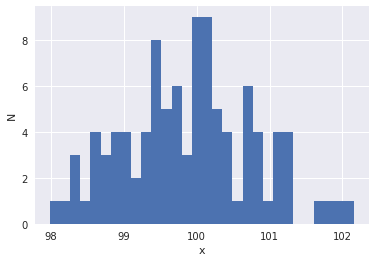

In [69]:
md['gaus']=np.random.normal(df, size=100)
pl.hist(md1['gaus'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 4: Normal distribution: mean=100, N=100

In [70]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Normal mean: 99.90, standard deviation: 0.87


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


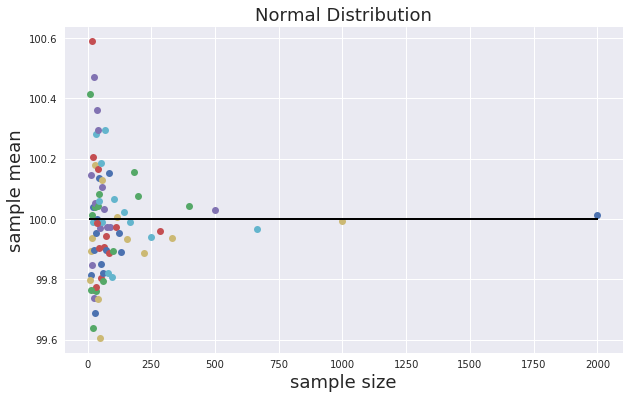

In [71]:
md['gaus'] = {}

for n in mysize:
    md['gaus'][n] = np.random.normal(df,size=n)

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Normal Distribution', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 5: The average of the results obtained from 100 trials is very close to population mean, which fits the law of large numbers. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


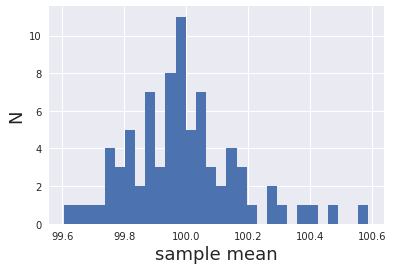

In [72]:
allmeans = list(md['gaus']['means'].values())
plt.hist(allmeans, bins=30)
plt.xlabel('sample mean', fontsize=18)
plt.ylabel('N', fontsize=18)

### Figure 6: histogram for Normal distribution sample means

# Do it for the Poisson distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


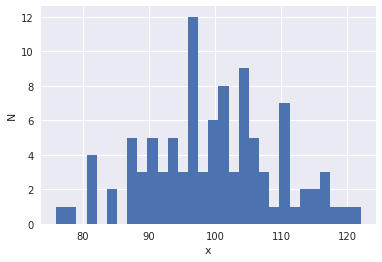

In [73]:
distributions = ['pois']
md['pois'] = np.random.poisson(df, size=100)
pl.hist(md['pois'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 7: Poisson distribution: lambda = 100, N=100

In [74]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 99.57, standard deviation: 9.69


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


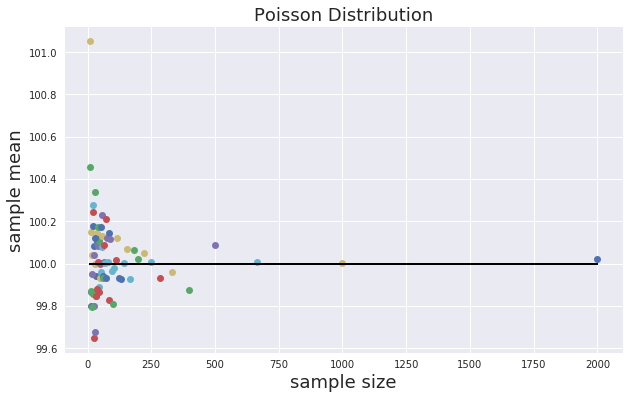

In [75]:
md['pois'] = {}

for n in mysize:
    md['pois'][n] = np.random.normal(df,size=n)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 8: the average of the results obtained from 100 trials is not quite close to population mean

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


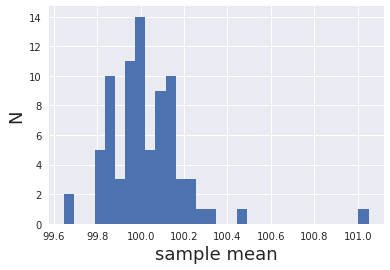

In [76]:
allmeans = list(md['pois']['means'].values())

plt.hist(allmeans, bins=30)
plt.xlabel('sample mean', fontsize=18)
plt.ylabel('N', fontsize=18)

### Figure 9: histogram for poisson distribution sample means

# Do it for the Binomial distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


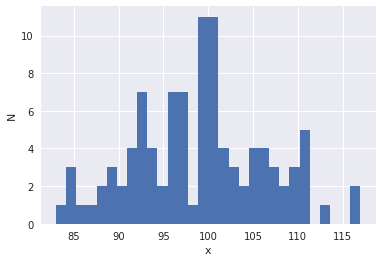

In [77]:
distributions = ['binomial']
md['binomial'] = np.random.binomial(200,0.5,100)

pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 10: Binomial distribution: n=200, p=0.5, N=100

In [78]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 98.96, standard deviation: 7.27


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


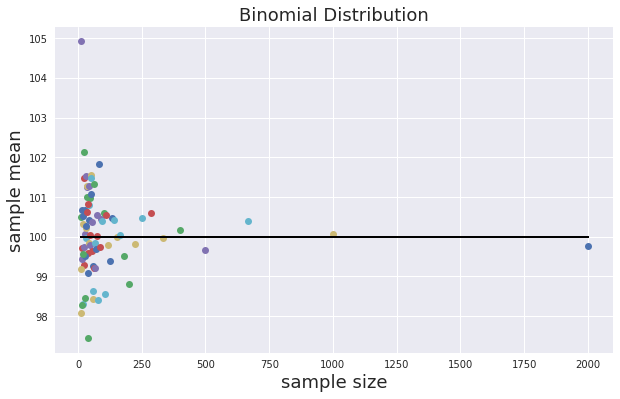

In [79]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = np.random.binomial(200,0.5, size = n)   

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [100,100], 'k')

### Figure 11: the average of the results obtained from 100 trials is tend to close to population mean, but most of them formed a vertical line at the begining of the x-axis.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


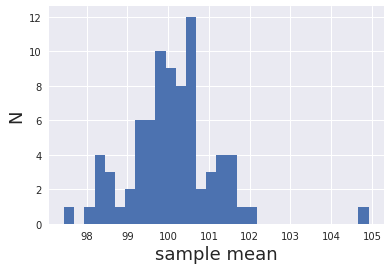

In [80]:
allmeans = list(md['binomial']['means'].values())

plt.hist(allmeans, bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize =18)

### Figure 12: histogram for binomial distribution sample mean

# Do it for another distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


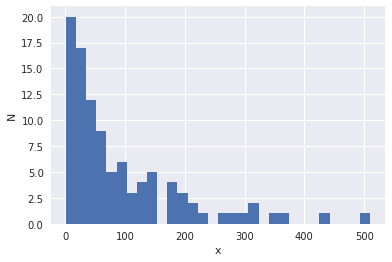

In [81]:
distributions = ['exp']
md['exp'] = np.random.exponential(100, size=100)

pl.hist(md['exp'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 13: Exponential distribution: scale = mean = 100, N=100

In [82]:
print ("exp mean: %.2f, standard deviation: %.2f"%(md['exp'].mean(), md['exp'].std()))

exp mean: 92.64, standard deviation: 101.03


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


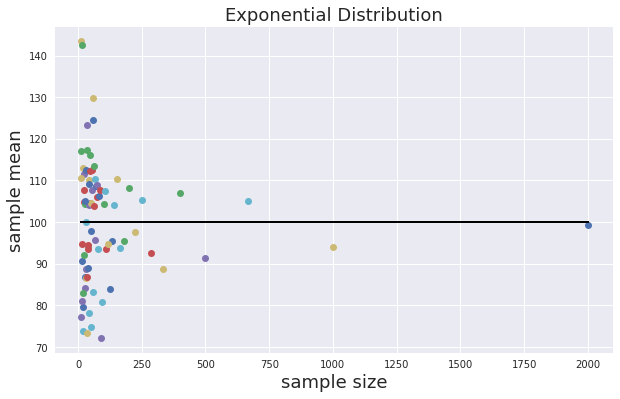

In [83]:
md['exp'] = {} 

for n in mysize:
    md['exp'][n] = np.random.exponential(100, size = n)  

md['exp']['means'] = {}
axwald_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exp']:
    if not type(nn) == str:
        md['exp']['means'][nn] = md['exp'][nn].mean()
        
        axwald_mu_n.plot(nn, md['exp']['means'][nn], 'o')
        axwald_mu_n.set_xlabel('sample size', fontsize=18)
        axwald_mu_n.set_ylabel('sample mean', fontsize=18)
        axwald_mu_n.set_title('Exponential Distribution', fontsize=18)
        axwald_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

### Figure 14: the average of the results obtained from 100 trials is close to the population mean, but there are outliers with sample mean larger than 180 at the top of the graph.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


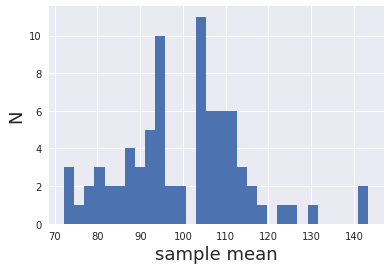

In [84]:
allmeans = list(md['exp']['means'].values())

plt.hist(allmeans, bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize =18)

### Figure 15: histogram for Exponential Distribution sample means

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


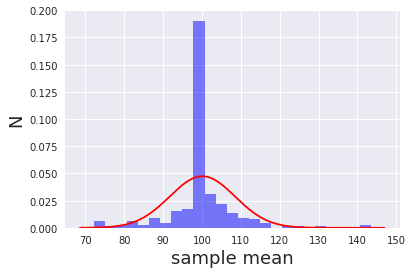

In [85]:
from scipy.stats import norm
all=list(md['exp']['means'].values())
all.extend(md['binomial']['means'].values())
all.extend(md['pois']['means'].values())
all.extend(md['exp']['means'].values())
all.extend(md['gaus']['means'].values())
all.extend(md['chisq']['means'].values())
plt.hist(all, bins=25, normed=True, alpha=0.5, color='b')
inputs=norm.fit(all)
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,500)
p = norm.pdf(x, loc = inputs[0], scale=inputs[1])
n = norm.pdf(x)
plt.plot(x, p, "red", label="Fitted line")
plt.title="Fitted Gaussian Distribution to the means: mean = %.2f, sd = %.2f"%(inputs[0], inputs[1])
plt.xlabel('sample mean', fontsize=18)
plt.ylabel('N', fontsize=18)

### Figure 16: Distributions of all sample means together with fitted gaussian line

Inspiration source of extra credit: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data